<a href="https://colab.research.google.com/github/richieyuyongpoh/Practical_Python_series/blob/main/Use_Case_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Use Case - Titanic [dataset](https://www.kaggle.com/competitions/titanic/data)

Prepared by:

Yong Poh Yu, PhD

LinkedIn: [Yong Poh Yu](https://www.linkedin.com/in/yong-poh-yu/)

Github: [Practical Python Series](https://github.com/richieyuyongpoh/Practical_Python_series)

## Installation 

Install [sweetviz](https://pypi.org/project/sweetviz/) library to do EDA.

In [1]:
!pip install sweetviz

     |████████████████████████████████| 15.1 MB 4.6 MB/s 


## Exploratory Data Analysis

1: Read the [train.csv](https://raw.githubusercontent.com/richieyuyongpoh/Practical_Python_series/main/train.csv) dataset.

In [8]:
import pandas as pd

titanic_data = pd.read_csv('https://raw.githubusercontent.com/richieyuyongpoh/Practical_Python_series/main/train.csv')


In [9]:
titanic_data.head()

,PassengerId,Age,Sex,Survived,Pclass,Name,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,22.0,male,0,3,"Braund, Mr. Owen Harris",1,0,A/5 21171,7.2500,NaN,S
1,2,38.0,female,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0,PC 17599,71.2833,C85,C
2,3,26.0,female,1,3,"Heikkinen, Miss. Laina",0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,35.0,female,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0,113803,53.1000,C123,S
4,5,35.0,male,0,3,"Allen, Mr. William Henry",0,0,373450,8.0500,NaN,S


2: Generate the sweetviz report 

                                             |          | [  0%]   00:00 -> (? left)


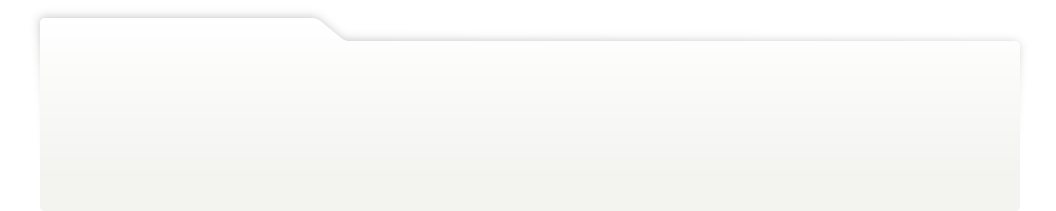
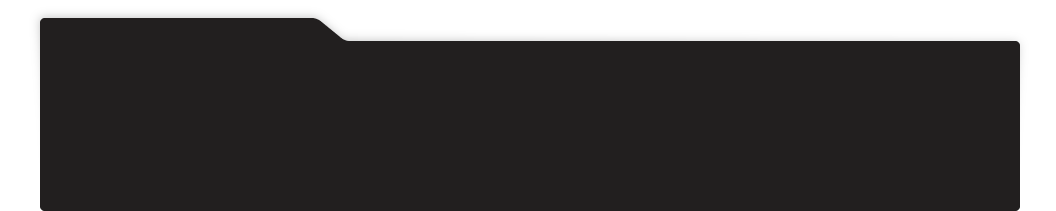
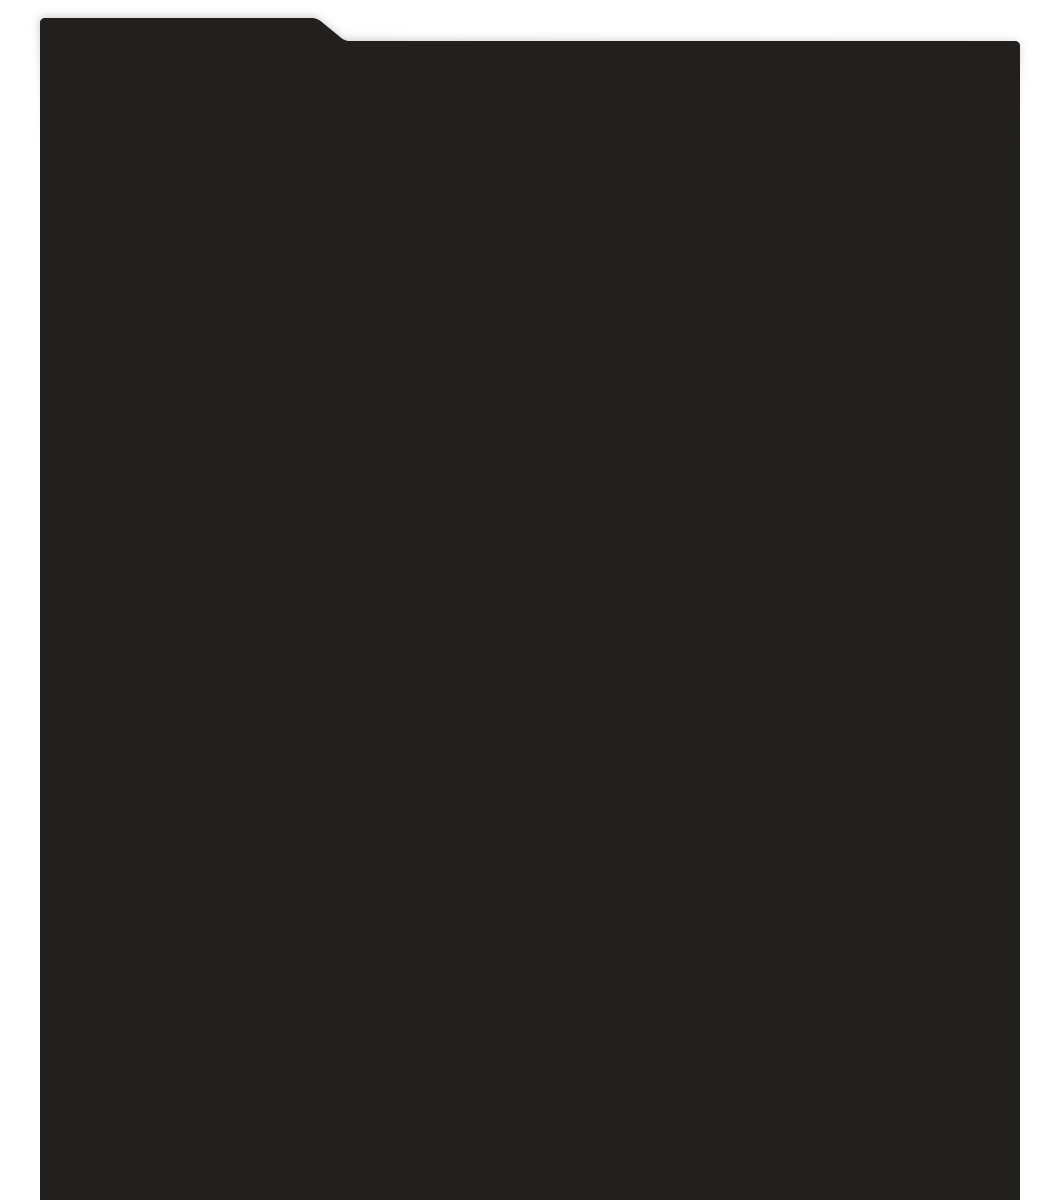
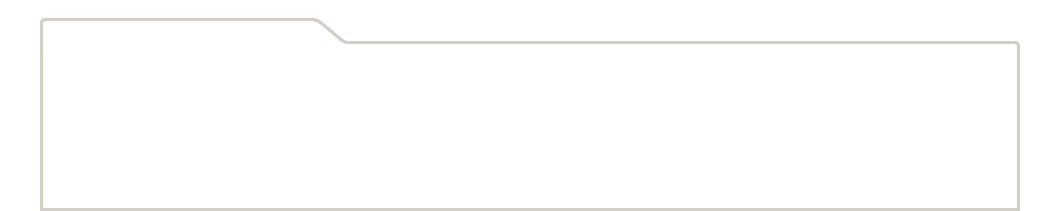
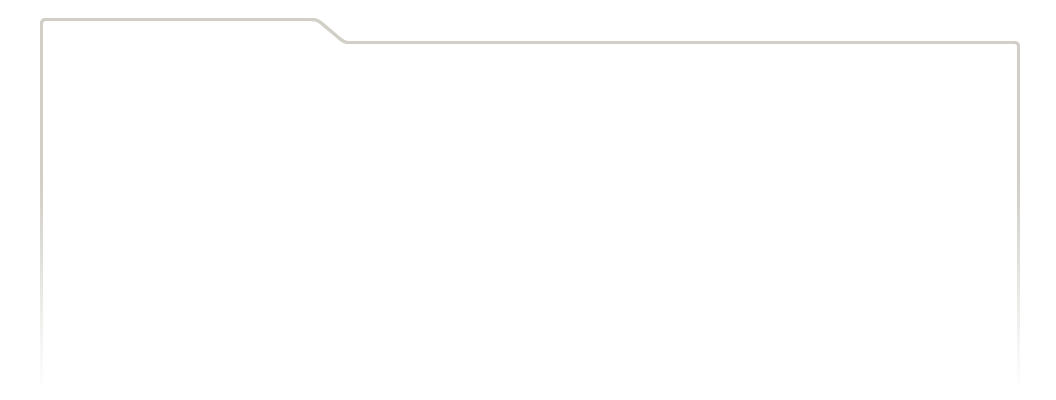
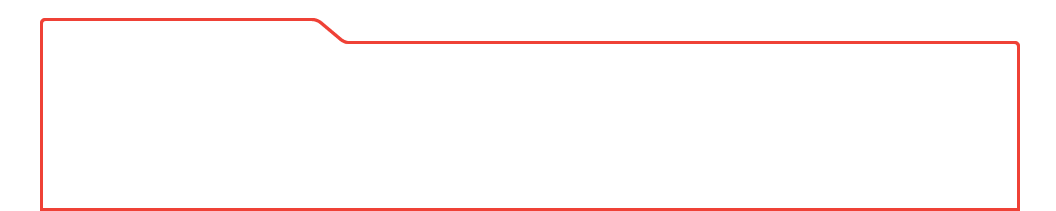
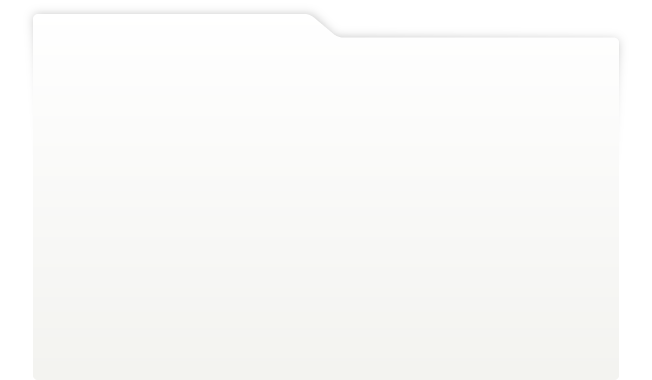
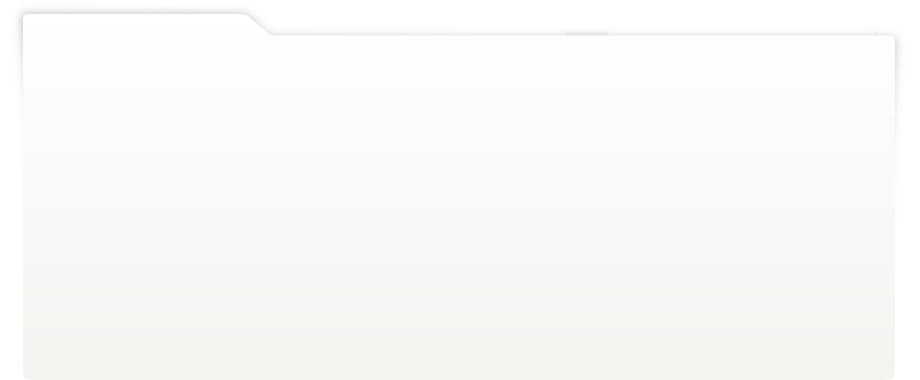
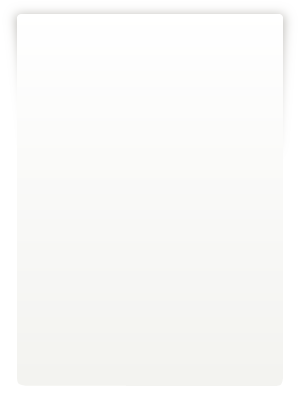
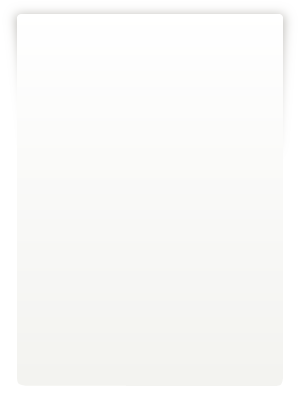
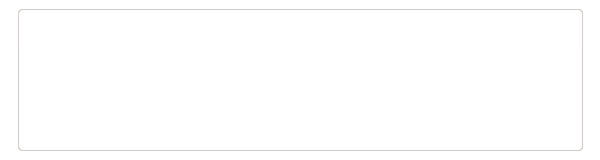
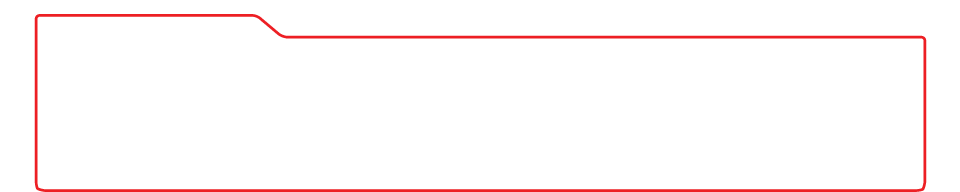
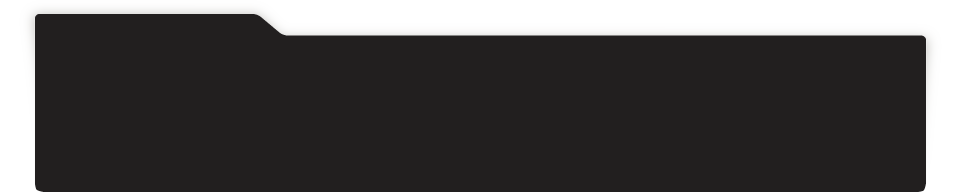
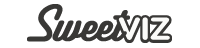
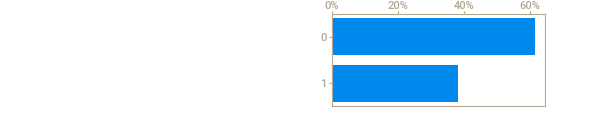
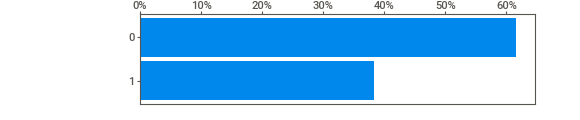
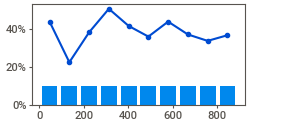
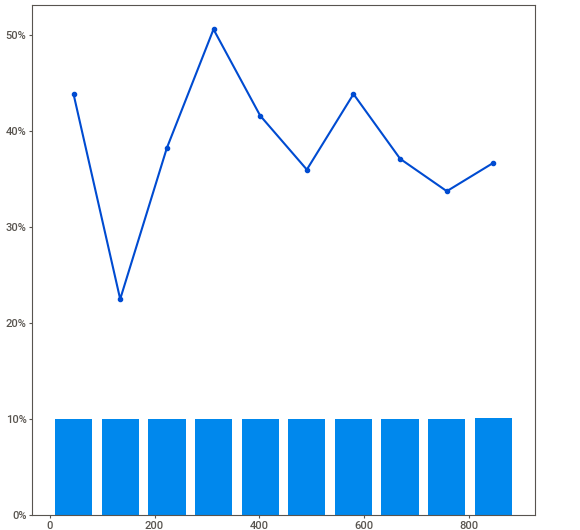
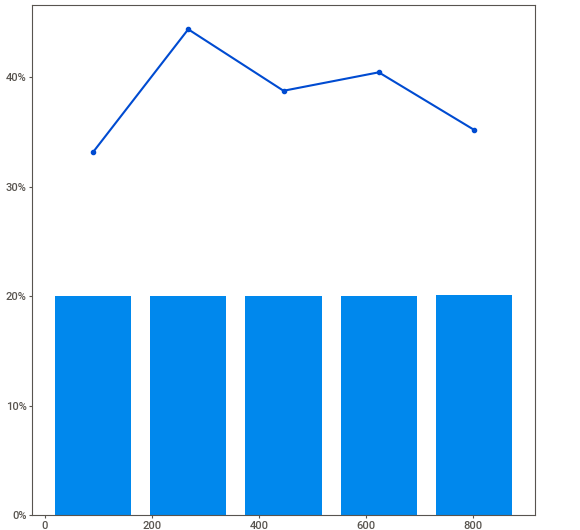
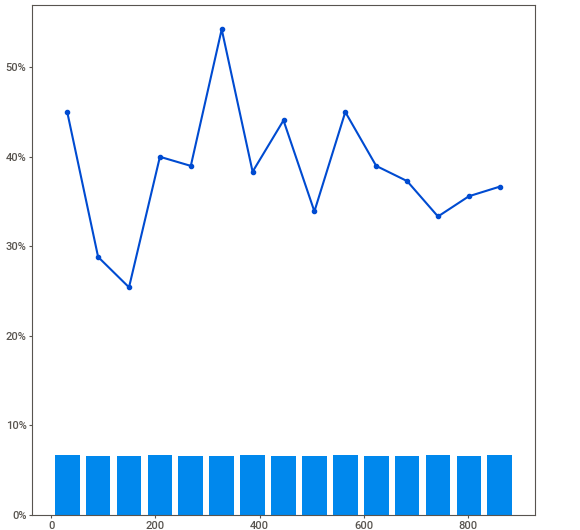
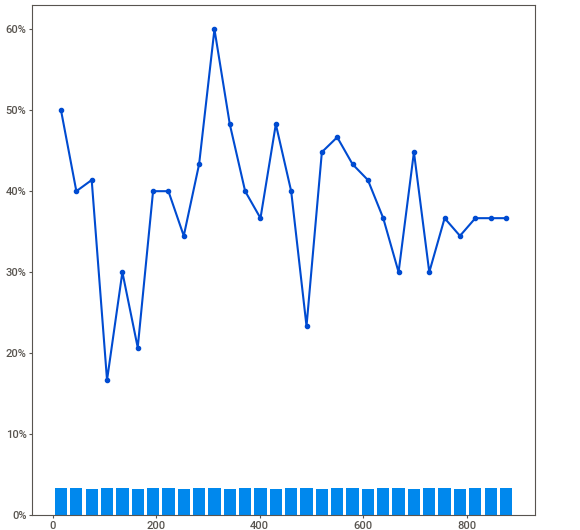
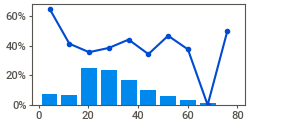
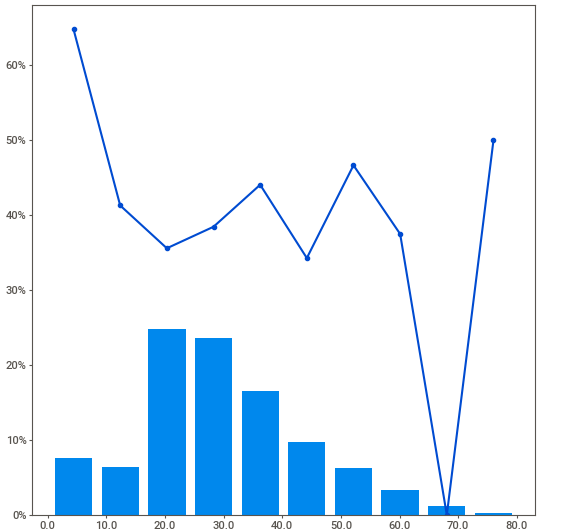
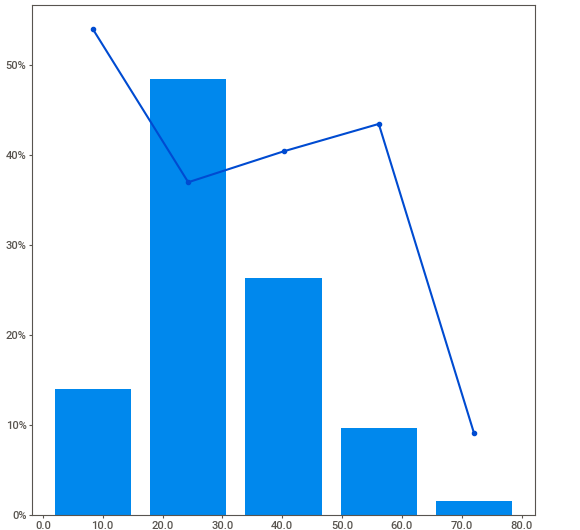
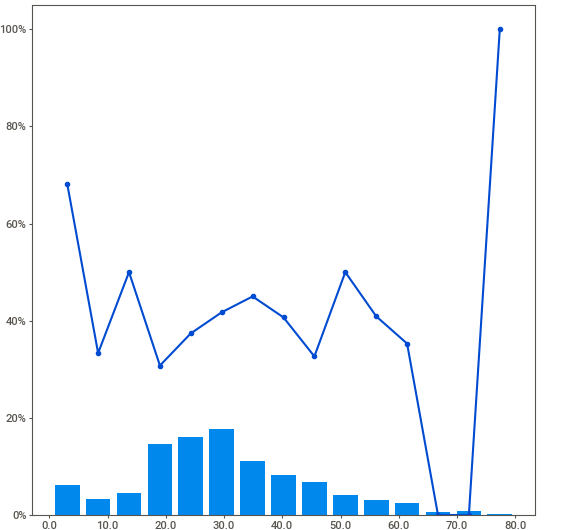
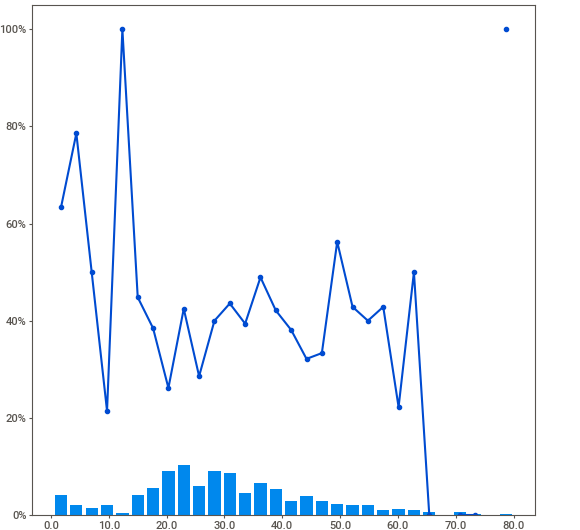
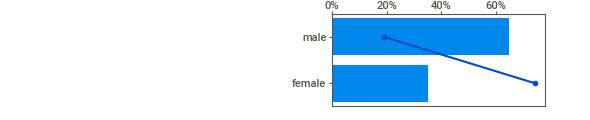
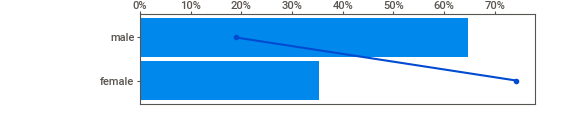
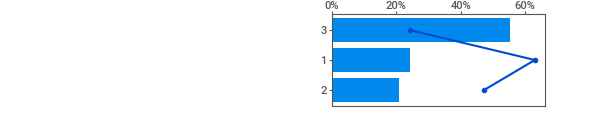
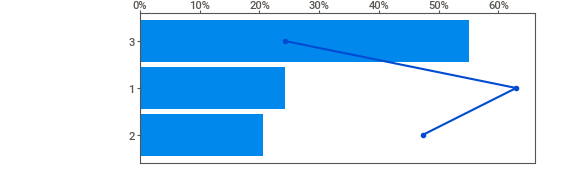
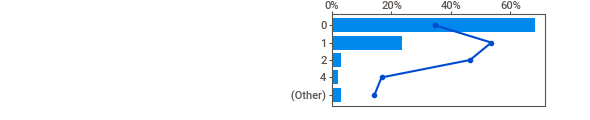
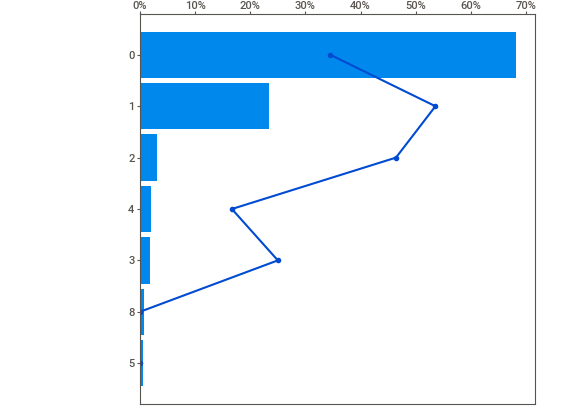
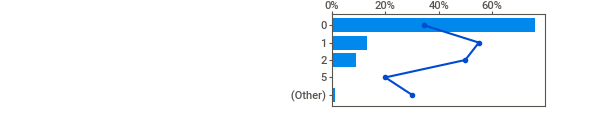
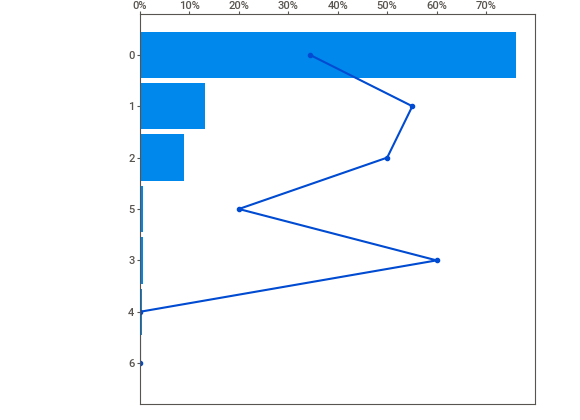
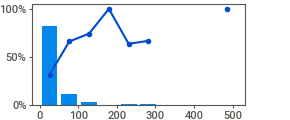
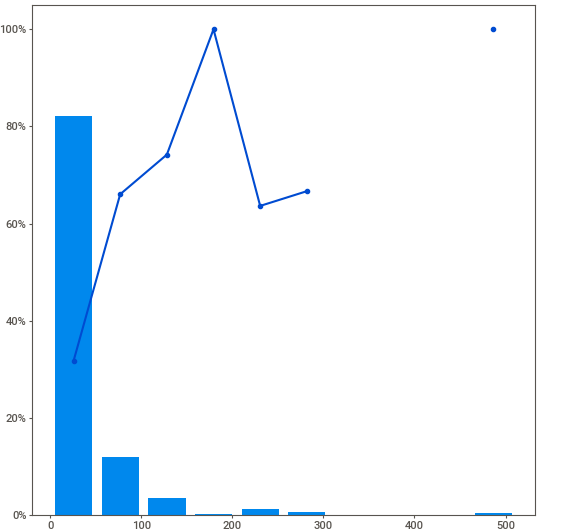
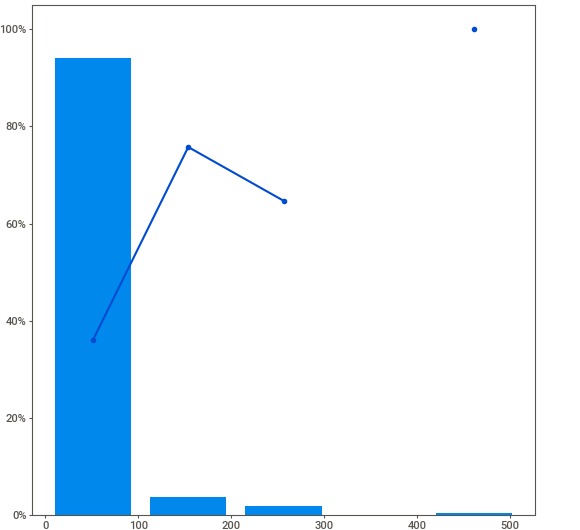
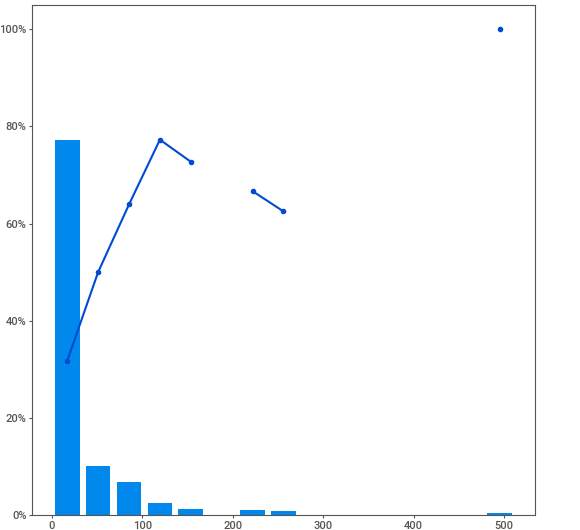
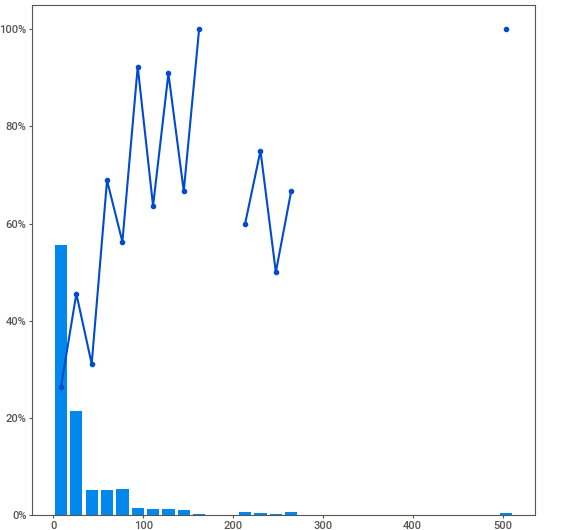
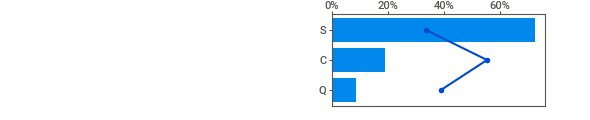
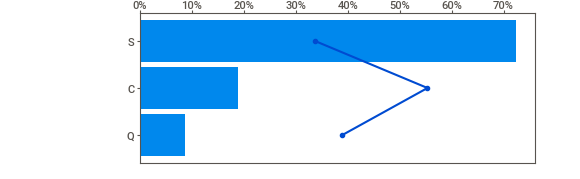
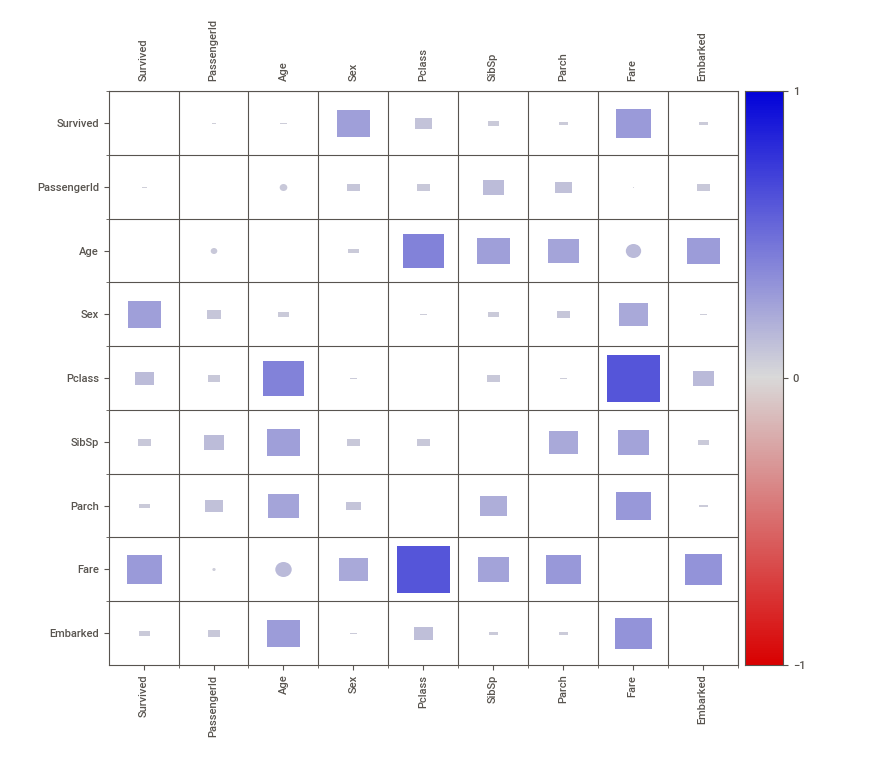
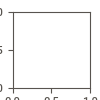

In [10]:
import sweetviz as sv


titanic_report = sv.analyze(titanic_data, target_feat='Survived')

titanic_report.show_notebook()

### Finding 1:

Generally, more female passengers survived. 

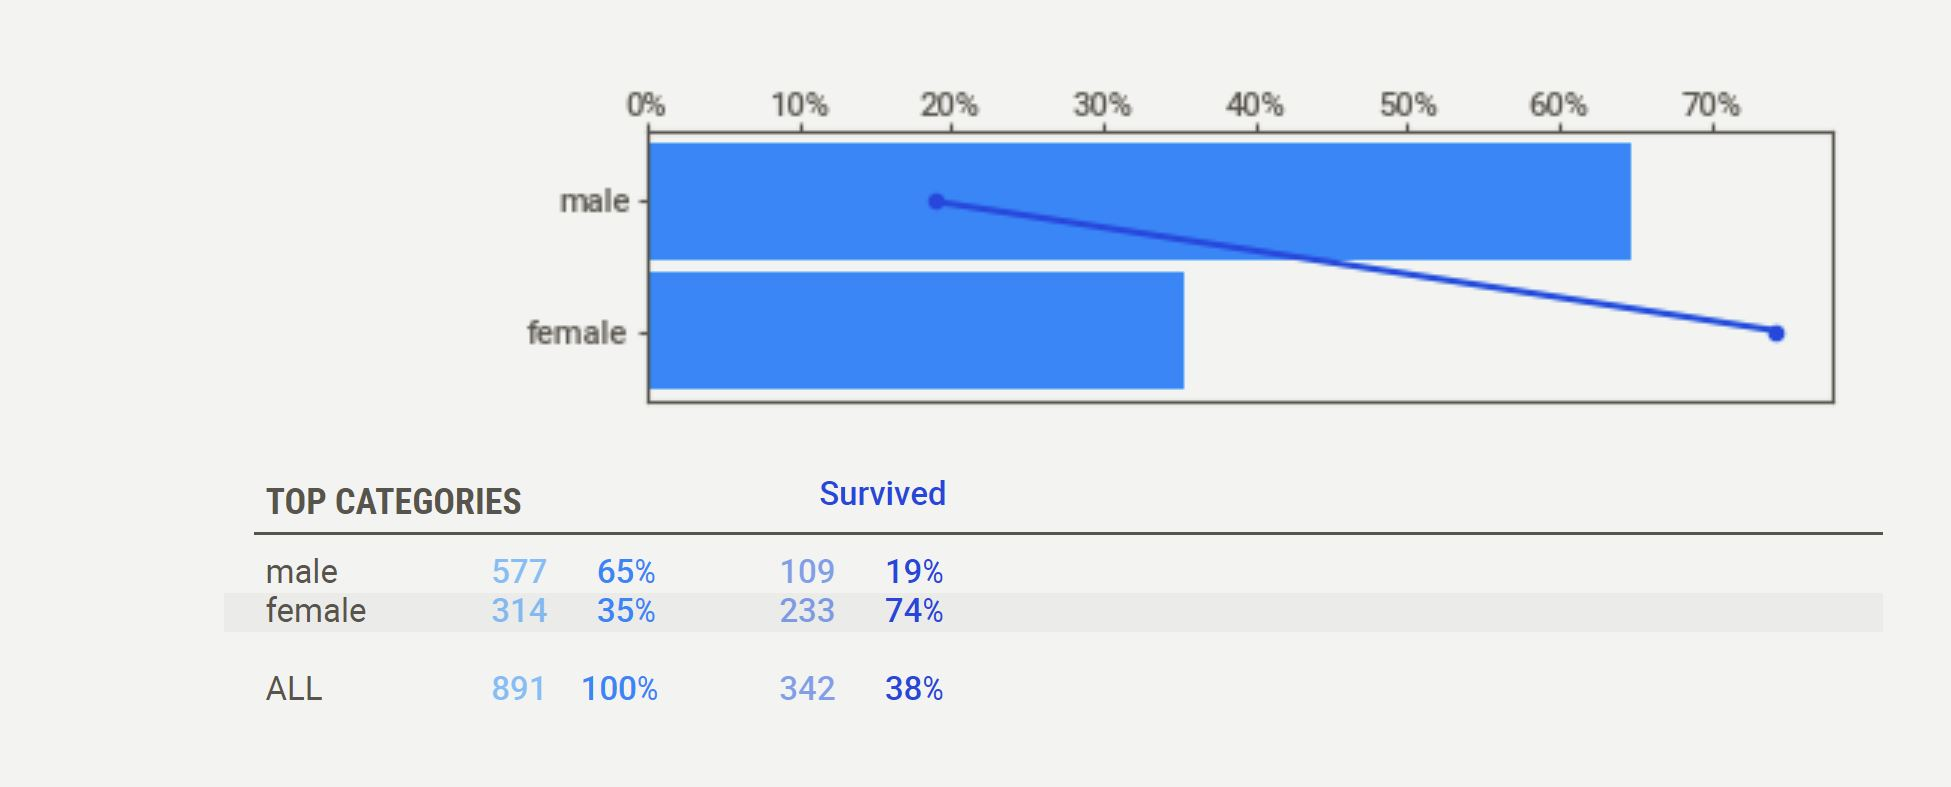

### Finding 2:



Sex and Fare were probably the important features that affected the survival rate.

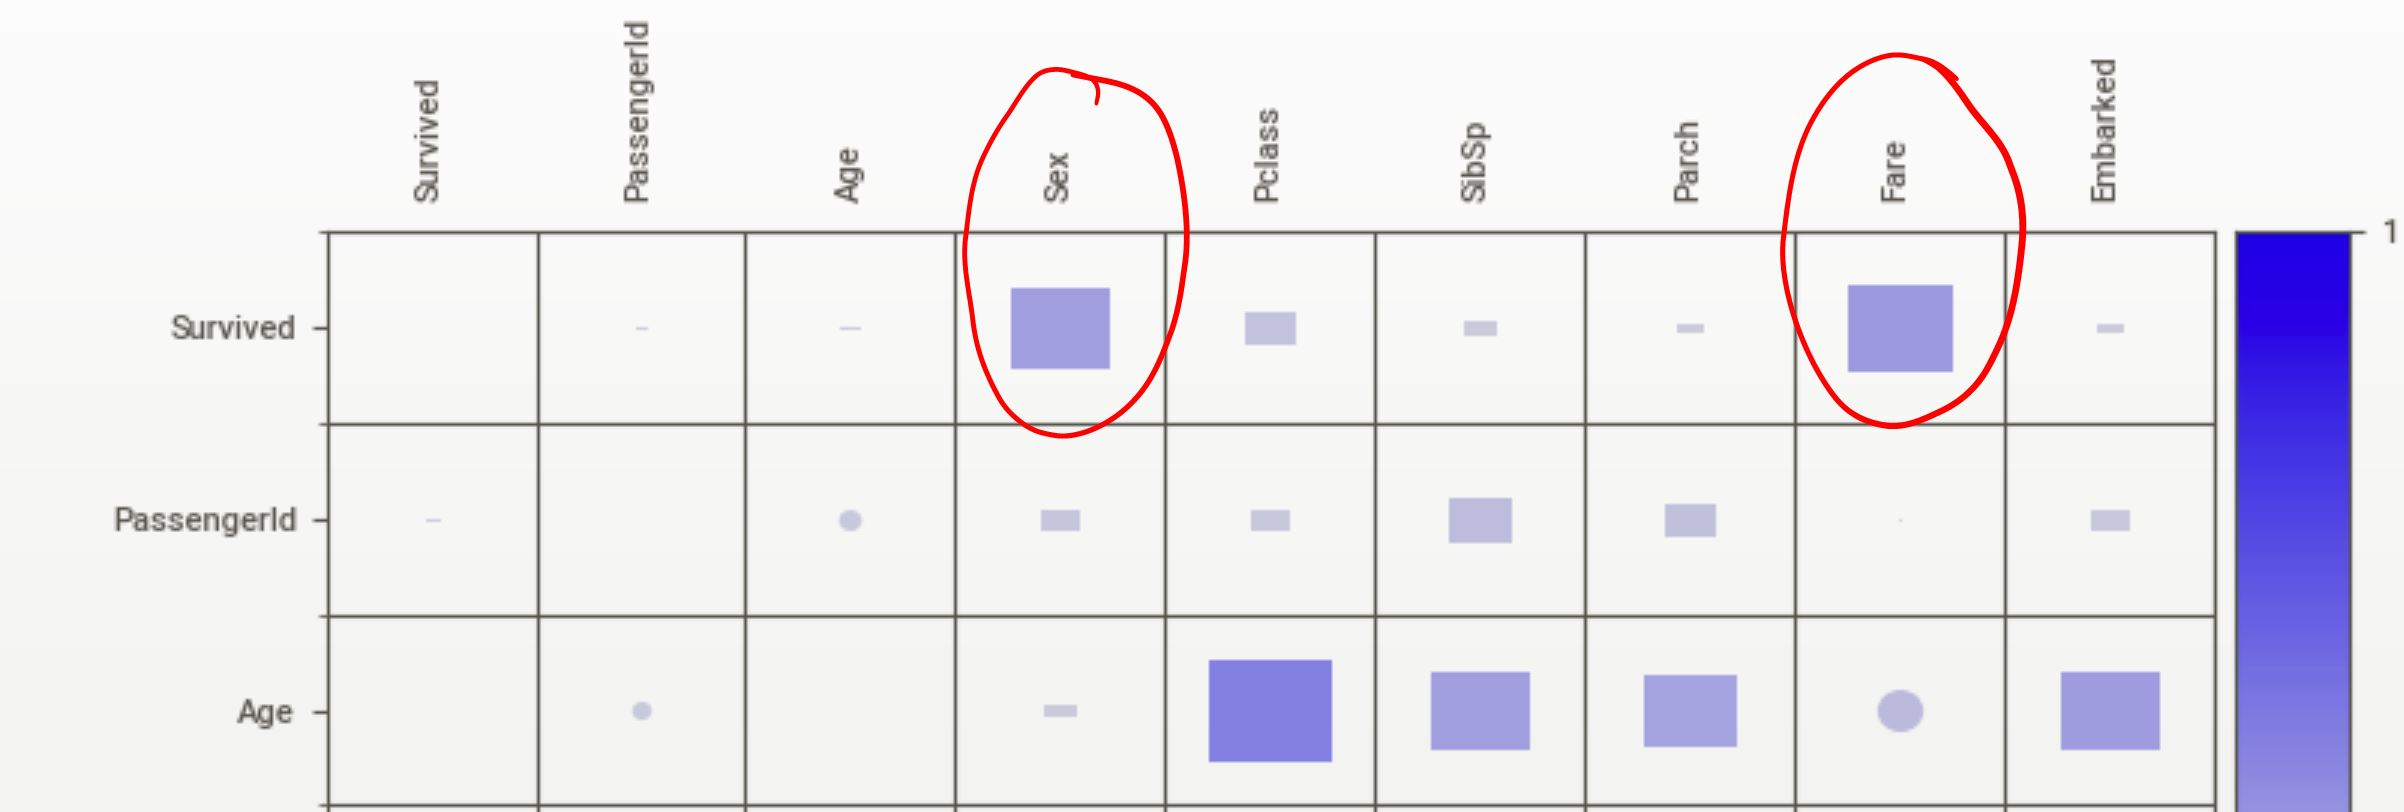

### Finding 3:



Young kids had the highest survival rate , as compared to the rest

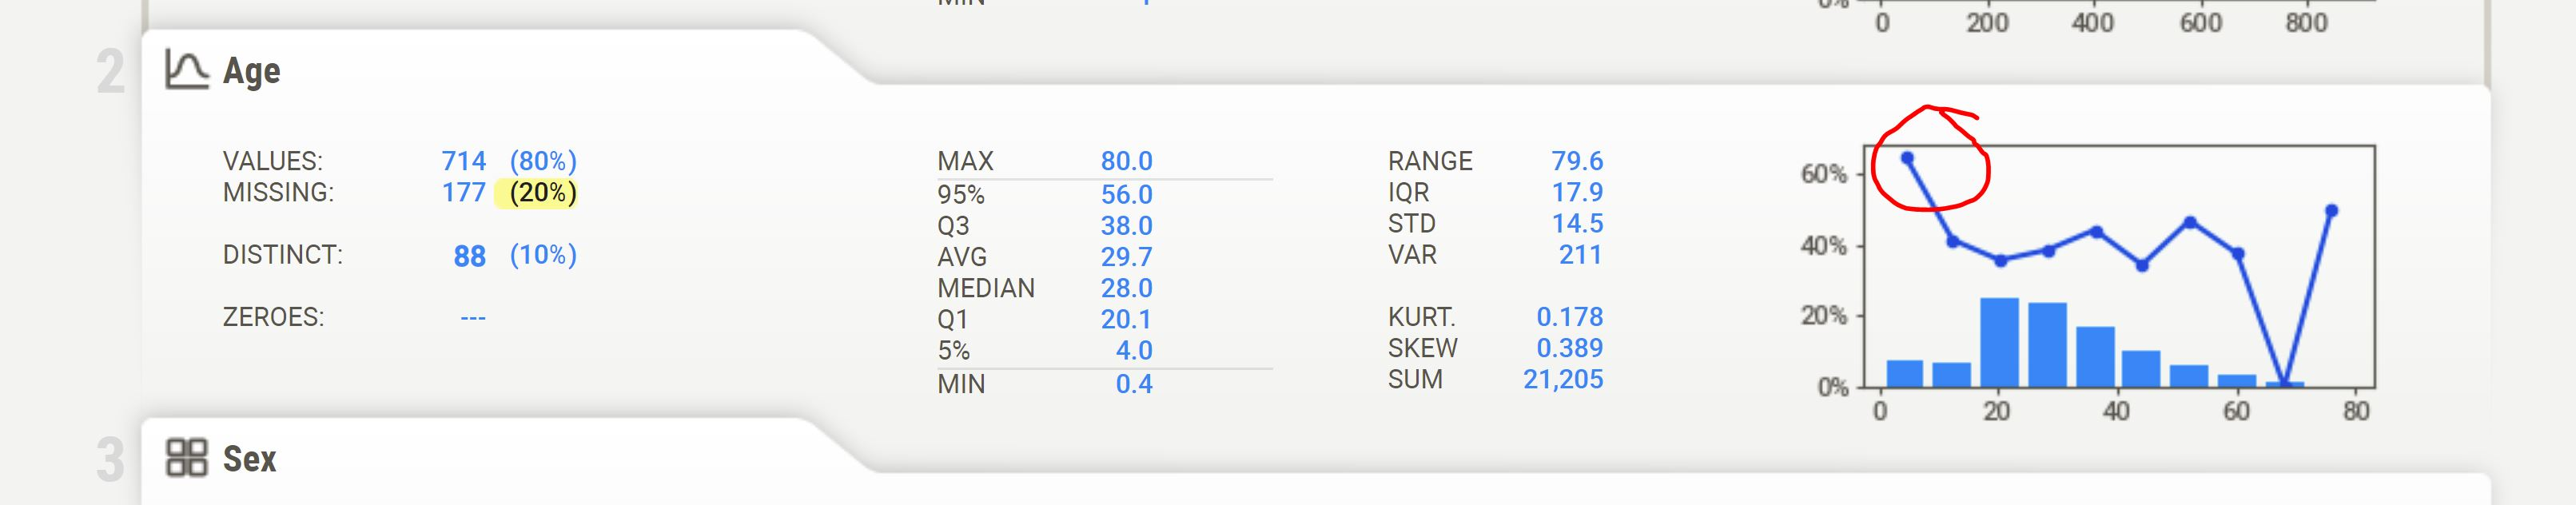

## Machine Learning



1: simple descriptive statistics

In [11]:
import pandas as pd

titanic_data = pd.read_csv('https://raw.githubusercontent.com/richieyuyongpoh/Practical_Python_series/main/train.csv')
titanic_data.info()
titanic_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Age          714 non-null    float64
 2   Sex          891 non-null    object 
 3   Survived     891 non-null    int64  
 4   Pclass       891 non-null    int64  
 5   Name         891 non-null    object 
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Age,Survived,Pclass,SibSp,Parch,Fare
count,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,29.699118,0.383838,2.308642,0.523008,0.381594,32.204208
std,257.353842,14.526497,0.486592,0.836071,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,223.500000,20.125000,0.000000,2.000000,0.000000,0.000000,7.910400
50%,446.000000,28.000000,0.000000,3.000000,0.000000,0.000000,14.454200
75%,668.500000,38.000000,1.000000,3.000000,1.000000,0.000000,31.000000
max,891.000000,80.000000,1.000000,3.000000,8.000000,6.000000,512.329200


2: As the `PassengerID` is the *primary key* or *id* for this table/dataset, remove it.

In [12]:
titanic_data = titanic_data.drop('PassengerId',axis=1)

titanic_data.head()

,Age,Sex,Survived,Pclass,Name,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,22.0,male,0,3,"Braund, Mr. Owen Harris",1,0,A/5 21171,7.2500,NaN,S
1,38.0,female,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0,PC 17599,71.2833,C85,C
2,26.0,female,1,3,"Heikkinen, Miss. Laina",0,0,STON/O2. 3101282,7.9250,NaN,S
3,35.0,female,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0,113803,53.1000,C123,S
4,35.0,male,0,3,"Allen, Mr. William Henry",0,0,373450,8.0500,NaN,S


3: As the `Name` and `Ticket` are irrelevant, remove them too

In [13]:
titanic_data = titanic_data.drop(['Name','Ticket'],axis=1)

titanic_data.head()

,Age,Sex,Survived,Pclass,SibSp,Parch,Fare,Cabin,Embarked
0,22.0,male,0,3,1,0,7.2500,NaN,S
1,38.0,female,1,1,1,0,71.2833,C85,C
2,26.0,female,1,3,0,0,7.9250,NaN,S
3,35.0,female,1,1,1,0,53.1000,C123,S
4,35.0,male,0,3,0,0,8.0500,NaN,S


4: From #1, `Cabin` column has too many NAs, let us drop it. 

In [14]:
titanic_data = titanic_data.drop('Cabin',axis=1)

titanic_data.head()

,Age,Sex,Survived,Pclass,SibSp,Parch,Fare,Embarked
0,22.0,male,0,3,1,0,7.2500,S
1,38.0,female,1,1,1,0,71.2833,C
2,26.0,female,1,3,0,0,7.9250,S
3,35.0,female,1,1,1,0,53.1000,S
4,35.0,male,0,3,0,0,8.0500,S


5: Age has some NAs too . Let us drop the rows with NAs. (Note: you may be interested to fill in/impute the NAs -- additional pre-processing work)

In [15]:
titanic_data = titanic_data.dropna()
titanic_data.head()

,Age,Sex,Survived,Pclass,SibSp,Parch,Fare,Embarked
0,22.0,male,0,3,1,0,7.2500,S
1,38.0,female,1,1,1,0,71.2833,C
2,26.0,female,1,3,0,0,7.9250,S
3,35.0,female,1,1,1,0,53.1000,S
4,35.0,male,0,3,0,0,8.0500,S


6: Define the Features , **X**

In [16]:
X = titanic_data.drop('Survived',axis=1)


X.head()

,Age,Sex,Pclass,SibSp,Parch,Fare,Embarked
0,22.0,male,3,1,0,7.2500,S
1,38.0,female,1,1,0,71.2833,C
2,26.0,female,3,0,0,7.9250,S
3,35.0,female,1,1,0,53.1000,S
4,35.0,male,3,0,0,8.0500,S


7: Define the target, **y**

In [17]:
y = titanic_data['Survived']
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

8: Remove the categorical variables that are written in texts, such as `Sex` and `Embarked`

Note: Later, we will pre-process these categorical variables and then include them for the modelling.

In [18]:


X = X.drop(['Sex','Embarked'],axis=1)


X.head()

,Age,Pclass,SibSp,Parch,Fare
0,22.0,3,1,0,7.2500
1,38.0,1,1,0,71.2833
2,26.0,3,0,0,7.9250
3,35.0,1,1,0,53.1000
4,35.0,3,0,0,8.0500


9: For the quick start, let us ignore pre-processing steps and directly move on to the machine learning (training & testing) steps.

Let us start with `train-test-split()`


In [19]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y,random_state=1234,test_size=0.2)

10: Apply *k*-NN model. 

In [20]:
from sklearn.neighbors import KNeighborsClassifier


knn = KNeighborsClassifier()
knn.fit(Xtrain, ytrain)
ypred = knn.predict(Xtest)


from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(ytest, ypred))
print()
print()
print(classification_report(ytest, ypred))

[[68 18]
 [24 33]]


              precision    recall  f1-score   support

           0       0.74      0.79      0.76        86
           1       0.65      0.58      0.61        57

    accuracy                           0.71       143
   macro avg       0.69      0.68      0.69       143
weighted avg       0.70      0.71      0.70       143



11: Try to tune the `n_neighbors` parameter

In [21]:
from sklearn.neighbors import KNeighborsClassifier


knn = KNeighborsClassifier(n_neighbors=25)
knn.fit(Xtrain, ytrain)
ypred = knn.predict(Xtest)


from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(ytest, ypred))
print()
print()
print(classification_report(ytest, ypred))

[[79  7]
 [24 33]]


              precision    recall  f1-score   support

           0       0.77      0.92      0.84        86
           1       0.82      0.58      0.68        57

    accuracy                           0.78       143
   macro avg       0.80      0.75      0.76       143
weighted avg       0.79      0.78      0.77       143



12: Apply SVM and observe the results

In [22]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(Xtrain, ytrain)
ypred = svc.predict(Xtest)

print(confusion_matrix(ytest, ypred))
print()
print()
print(classification_report(ytest, ypred))

[[82  4]
 [36 21]]


              precision    recall  f1-score   support

           0       0.69      0.95      0.80        86
           1       0.84      0.37      0.51        57

    accuracy                           0.72       143
   macro avg       0.77      0.66      0.66       143
weighted avg       0.75      0.72      0.69       143



13: Try to tune the `C` parameter

In [23]:
from sklearn.svm import SVC

svc = SVC(C=30)
svc.fit(Xtrain, ytrain)
ypred = svc.predict(Xtest)

print(confusion_matrix(ytest, ypred))
print()
print()
print(classification_report(ytest, ypred))

[[80  6]
 [24 33]]


              precision    recall  f1-score   support

           0       0.77      0.93      0.84        86
           1       0.85      0.58      0.69        57

    accuracy                           0.79       143
   macro avg       0.81      0.75      0.76       143
weighted avg       0.80      0.79      0.78       143



14: Apply Logistic Regression and observe the results

In [24]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

logreg.fit(Xtrain, ytrain)
ypred = logreg.predict(Xtest)

print(confusion_matrix(ytest, ypred))
print()
print()
print(classification_report(ytest, ypred))

[[73 13]
 [24 33]]


              precision    recall  f1-score   support

           0       0.75      0.85      0.80        86
           1       0.72      0.58      0.64        57

    accuracy                           0.74       143
   macro avg       0.73      0.71      0.72       143
weighted avg       0.74      0.74      0.74       143



15: Apply NB and observe the results

In [25]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(Xtrain, ytrain)
ypred = nb.predict(Xtest)

print(confusion_matrix(ytest, ypred))
print()
print()
print(classification_report(ytest, ypred))


[[79  7]
 [31 26]]


              precision    recall  f1-score   support

           0       0.72      0.92      0.81        86
           1       0.79      0.46      0.58        57

    accuracy                           0.73       143
   macro avg       0.75      0.69      0.69       143
weighted avg       0.75      0.73      0.72       143



16: Apply RF and observe the results

In [26]:
from sklearn.ensemble import RandomForestClassifier

RandomForest = RandomForestClassifier()
RandomForest.fit(Xtrain, ytrain)
ypred = RandomForest.predict(Xtest)

print(confusion_matrix(ytest, ypred))
print()
print()
print(classification_report(ytest, ypred))

[[68 18]
 [26 31]]


              precision    recall  f1-score   support

           0       0.72      0.79      0.76        86
           1       0.63      0.54      0.58        57

    accuracy                           0.69       143
   macro avg       0.68      0.67      0.67       143
weighted avg       0.69      0.69      0.69       143



17: Try to tune different parameters

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

RandomForest = RandomForestClassifier(n_estimators=500,max_depth=6)
RandomForest.fit(Xtrain, ytrain)
ypred = RandomForest.predict(Xtest)

print(confusion_matrix(ytest, ypred))
print()
print()
print(classification_report(ytest, ypred))

[[76 10]
 [19 38]]


              precision    recall  f1-score   support

           0       0.80      0.88      0.84        86
           1       0.79      0.67      0.72        57

    accuracy                           0.80       143
   macro avg       0.80      0.78      0.78       143
weighted avg       0.80      0.80      0.79       143



18: Apply label encoder to the categorical variables

In [29]:
from sklearn.preprocessing import LabelEncoder

titanic_data = pd.read_csv('https://raw.githubusercontent.com/richieyuyongpoh/Practical_Python_series/main/train.csv')
titanic_data = titanic_data.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
titanic_data = titanic_data.dropna()

# use different label encoders to encode the variables, respectively , when predicting a completely new dataset later 

labelencoder1 = LabelEncoder() 
labelencoder2 = LabelEncoder()

titanic_data['Sex'] = labelencoder1.fit_transform(titanic_data['Sex'])
titanic_data['Embarked'] = labelencoder2.fit_transform(titanic_data['Embarked'])
titanic_data.head()

,Age,Sex,Survived,Pclass,SibSp,Parch,Fare,Embarked
0,22.0,1,0,3,1,0,7.2500,2
1,38.0,0,1,1,1,0,71.2833,0
2,26.0,0,1,3,0,0,7.9250,2
3,35.0,0,1,1,1,0,53.1000,2
4,35.0,1,0,3,0,0,8.0500,2


Note: How about one hot encoder?

19: Repeat #6, #7, and #9

In [30]:
X = titanic_data.drop('Survived',axis=1)
y = titanic_data['Survived']
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y,random_state=1234,test_size=0.2)

20: Repeat #16 and #17

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

RandomForest = RandomForestClassifier(n_estimators=500,max_depth=9)
RandomForest.fit(Xtrain, ytrain)
ypred = RandomForest.predict(Xtest)

print(confusion_matrix(ytest, ypred))
print()
print()
print(classification_report(ytest, ypred))

[[78  8]
 [19 38]]


              precision    recall  f1-score   support

           0       0.80      0.91      0.85        86
           1       0.83      0.67      0.74        57

    accuracy                           0.81       143
   macro avg       0.82      0.79      0.80       143
weighted avg       0.81      0.81      0.81       143



21: Feature Importance

In [32]:
important_features = pd.DataFrame({'Factor': list(X.columns), 'Importance': RandomForest.feature_importances_})
important_features

,Factor,Importance
0,Age,0.225480
1,Sex,0.324431
2,Pclass,0.100276
3,SibSp,0.052374
4,Parch,0.043921
5,Fare,0.224306
6,Embarked,0.029212


In [33]:
important_features.sort_values(by=['Importance'], ascending=False,inplace=True)
important_features

,Factor,Importance
1,Sex,0.324431
0,Age,0.225480
5,Fare,0.224306
2,Pclass,0.100276
3,SibSp,0.052374
4,Parch,0.043921
6,Embarked,0.029212


22: Predict the New Dataset (that doesn't have `y` column). Use [`test.csv`](https://raw.githubusercontent.com/richieyuyongpoh/Practical_Python_series/main/test.csv) as the dataset.

In [34]:


titanic_data2 = pd.read_csv('https://raw.githubusercontent.com/richieyuyongpoh/Practical_Python_series/main/test.csv')
titanic_data2 = titanic_data2.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
titanic_data2 = titanic_data2.dropna()




titanic_data2['Sex'] = labelencoder1.transform(titanic_data2['Sex'])
titanic_data2['Embarked'] = labelencoder2.transform(titanic_data2['Embarked'])



ypred = RandomForest.predict(titanic_data2)
ypred

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


array([0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,

23: Challenges

What if we don't ignore/remove the missing values? Any other better ways to improve the performance?

Prepared by:

Yong Poh Yu, PhD

LinkedIn: [Yong Poh Yu](https://www.linkedin.com/in/yong-poh-yu/)

Github: [Practical Python Series](https://github.com/richieyuyongpoh/Practical_Python_series)